<a href="https://colab.research.google.com/github/Samikshab99/ML-Classcification-Cardiovascular-Risk-Prediction/blob/main/ML_Classification%3DCardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>  **Project Title:Cardiovascular Risk Prediction**<b><u>


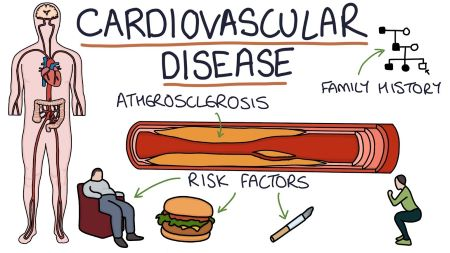

### **Problem Description**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.



## **Cardiovascular disease:**
Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels.

**Types of CVD:**

There are many different types of CVD. Four of the main types are described below:

**Coronary heart disease**

Coronary heart disease occurs when the flow of oxygen-rich blood to the heart muscle is blocked or reduced.

This puts an increased strain on the heart, and can lead to:
*   angina – chest pain caused by restricted blood flow to the heart muscle
*   heart attacks – where the blood flow to the heart muscle is suddenly blocked
* heart failure – where the heart is unable to pump blood around the body properly

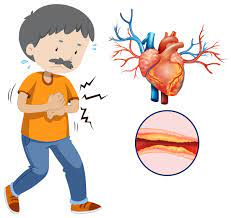

## **Causes of CVD:**
* The exact cause of CVD isn't clear, but there are lots of things that can increase your risk of getting it. These are called "risk factors".

* The more risk factors you have, the greater your chances of developing CVD.

* If you're over 40, you'll be invited by your GP for an NHS Health Check every 5 years.

* Part of this check involves assessing your individual CVD risk and advising you how to reduce it if necessary.

The main risk factors for CVD are outlined below:

**High blood pressure:**

High blood pressure (hypertension) is one of the most important risk factors for CVD. If your blood pressure is too high, it can damage your blood vessels.

**Smoking:**

Smoking and other tobacco use is also a significant risk factor for CVD. The harmful substances in tobacco can damage and narrow your blood vessels.

**High cholesterol:**

Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot.

**Diabetes:**

Diabetes is a lifelong condition that causes your blood sugar level to become too high.

High blood sugar levels can damage the blood vessels, making them more likely to become narrowed.

Many people with type 2 diabetes are also overweight or obese, which is also a risk factor for CVD.

**Inactivity:**

If you don't exercise regularly, it's more likely that you'll have high blood pressure, high cholesterol levels and be overweight. All of these are risk factors for CVD.

Exercising regularly will help keep your heart healthy. When combined with a healthy diet, exercise can also help you maintain a healthy weight.

**Being overweight or obese:**

Being overweight or obese increases your risk of developing diabetes and high blood pressure, both of which are risk factors for CVD.

You're at an increased risk of CVD if:

your body mass index (BMI) is 25 or above – use the BMI healthy weight calculator to work out your BMI you're a man with a waist measurement of 94cm (about 37 inches) or more, or a woman with a waist measurement of 80cm (about 31.5 inches) or more

## **Preventing CVD:**
A healthy lifestyle can lower your risk of CVD. If you already have CVD, staying as healthy as possible can reduce the chances of it getting worse.

Ways you can reduce your CVD risk are outlined below.

**Stop smoking:**

If you smoke, you should try to give up as soon as possible. The NHS Smokefree website can provide information, support and advice to help.
Your GP can also provide you with advice and support. They can also prescribe medication to help you quit.

Have a balanced diet:

A healthy, balanced diet is recommended for a healthy heart.
A balanced diet includes:

Low levels of saturated fat (found in foods such as fatty cuts of meat, lard, cream, cakes and biscuits) – try to include healthier sources of fat, such as oily fish, nuts and seeds, and olive oil low levels of salt – aim for less than 6g (0.2oz or 1 teaspoon) a day low levels of sugar plenty of fibre and wholegrain foods plenty of fruit and vegetables – eat at least 5 portions of fruit and vegetables a day

**Exercise regularly:**

Adults are advised to do at least 150 minutes of moderate activity a week, such as cycling or brisk walking.

If you find it difficult to do this, start at a level you feel comfortable with and gradually increase the duration and intensity of your activity as your fitness improves.

Visit your GP for a health check if you haven't exercised before or you're returning to exercise after a long break.

Maintain a healthy weight:

If you're overweight or obese, a combination of regular exercise and a healthy diet can help you lose weight. Aim to get your BMI below 25.

If you're struggling to lose weight, your GP or practice nurse can help you come up with a weight loss plan and recommend services in your area.

**Cut down on alcohol:**

If you drink alcohol, try not to exceed the recommended limit of 14 alcohol units a week for men and women.

If you do drink this much, you should aim to spread your drinking over 3 days or more.

A unit of alcohol is roughly equivalent to half a pint of normal-strength lager or a single measure (25ml) of spirits. A small glass of wine (125ml) is about 1.5 units.

Your GP can give you help and advice if you're finding it difficult to cut down your drinking.


**Medication:**

If you have a particularly high risk of developing CVD, your GP may recommend taking medication to reduce your risk.

Medications that may be recommended include statins to lower blood cholesterol levels, low-dose aspirin to prevent blood clots, and tablets to reduce blood pressure.



---



### **Data Description**:
**Demographic**:
*   Sex: male or female("M" or "F")
*   Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral:**
*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
*   BP Meds: whether or not the patient was on blood pressure medication (Nominal)
*   Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
*   Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
*   Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
*   Tot Chol: total cholesterol level (Continuous)
*   Sys BP: systolic blood pressure (Continuous)
*   Dia BP: diastolic blood pressure (Continuous)
*   BMI: Body Mass Index (Continuous)
*   Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
*   Glucose: glucose level (Continuous)
*   Predict variable (desired target)
*   10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV


---






















Exploration of data in data science is as important as the age of exploration (discovery) was for geography, history, science and humanity. Age of exploration seeded the idea of globalization in true sense. Today one of the major health issue faced by the people around the word is Heart Diseases.

With access to Cardiovascular Database our first task is to explore the data to really understand it and try to learn from it. We really dont know what we gonna find out but, we very excited!

So here go !

# Lets begin with rituals !

## **Importing libraries**

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
'''from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter'''

%matplotlib inline

# **Importing file:**

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the csv file containing data
df=pd.read_csv('/content/drive/MyDrive/Supervised ML- Classification/data_cardiovascular_risk.csv',encoding="ISO-8859-1")

In [4]:
# As we have the data now, lets see what's in it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## 17 columns of data with with acronymed headers.
## Looks like we need to read all  column names try to figure out what data they are really storing.

In [5]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
# Basic
df.shape

(3390, 17)

In [7]:
# Thats a lot of data
df.size

57630

In [8]:
# This is supposed to show first 5 rows of dataframe.
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [10]:
# rename columns
df= df.rename(columns= {'id':'ID','age':'Age','education':'Education','sex':'Gender','is_smoking':'Smoking','cigsPerDay':'Cig_Per_Day',
                                      'BPMeds':'BP_Medication','prevalentStroke':'Had_Stroke','prevalentHyp':'Was_Hypertensive','diabetes':'Had_Diabetes',
                                      'totChol':'Tot_chol_Level','sysBP':'Systolic_BP','diaBP':'Diastolic _BP','glucose':'Glucose_level','TenYearCHD':'Ten_Year_Risk'})

In [11]:
# Looking up for the detailed description of our dataset.
df.describe(include='all')

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Checking min and max, All data points are in valid range.



**Variable Breakdown:**

---
If we want to understands how much individual feature that contibuting for the prediction, we want to understands nature of the feature. if we understands its more intuitive to make hypothesis.

**ID:**

Distinct numericals assigned to every sample for health register and Track system.





In [12]:
#getting unique elements of id 
df['ID'].unique()

array([   0,    1,    2, ..., 3387, 3388, 3389])

**Education:**

Demographic information of every individuals considered as a privacy encoded in 1 to 4 scale. And some patients details are missing.

In [13]:
#getting unique elements of education 
df['Education'].unique()

array([ 2.,  4.,  1.,  3., nan])

**Gender:**

Categorical feature is patient is Male(M) or Female(F).

**Smoking:**

Categorical feature whether the patient have a habit of smoking(YES) or not(YES). Its an important factor, is patient who having habit of smoking has higher chance of Heart disease.

**Cigarettes per Day:**

32 distinct numericals as how many cigarets thus patient smokes on a day. Since number of cigaretes per day varies from patient to patient this numericals considered as continous datapoints.

In [14]:
#getting unique elements of cig_per_day
df['Cig_Per_Day'].unique(),df['Cig_Per_Day'].nunique()

(array([ 3.,  0., 10., 20., 30., 35., 40., 15.,  9., 60., 17., 25.,  5.,
        43.,  7., 50., 19., 18.,  1., 45.,  2.,  6., nan, 11.,  8.,  4.,
        14., 16., 23., 13., 12., 70., 38.]), 32)

**Medical History:**

**BP Medication:** Blood pressure is a force thats exerts blood on the wall of their blood vessels. If patient unders some Blood pressure related medication(Yes-1) or not(No-0). Considered as categorical feature.

**Had Stroke:**
 Stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. Hence its a crucial feature. If patient had stroke(Yes - 1) or not(No-0).

**was_Hypertensive: **
Hypertensive relates to Blood pressure, hypertensive persons having high risk for cardiovascular disease, stroke, Heart aattack and heart failure. If patient was hypertensive(Yes - 1) or not(No - 0).

**Had_Diabetes:**
Diabetes is a disease when blood glucose or sugar level too high. Over a time high glucose in bloods leads to Heart disease and stroke. If patient had diabetes(Yes-1) or not (No-0).

**Tol_chol_Level:** 
Total cholestrol level - Cholestrol is a waxy, fat-like substaance that created by liver from the food we ate. If there too much cholestrol in blood leads to heart disease. Here, cholestrol level of every patients recorded it takes continous data ponits. Higher the cholestrol paatient have to classify under risky class.

**Systolic BP:**
Force that exerts blood on the wall of blood vessel when heart beats. Feaatures contains continous spectrum of data.

**Diastolic Pressure:** Force that exerts blood on the wall of blood vessel when heart rests. Feaatures contains continous spectrum of data.

**BMI:** BMI - Body Mass Index, determined from weight and height of patients. Contains continous data points.

**Heartrate:** No of times that heart beats per minute. Higher the rate higher the risk of heart disease. Rates recoreded considered as continous data points.

**Glucose_level:** Level of glucose in patients blood, higher glucose level accumltes in blood vessels leads to heart disease. levels recorded for every patients in continous data points.

## **Handling Null Nalues:**

In [15]:
#getting null values
df.isna().sum().sort_values(ascending=False)

Glucose_level       304
Education            87
BP_Medication        44
Tot_chol_Level       38
Cig_Per_Day          22
BMI                  14
heartRate             1
ID                    0
Diastolic _BP         0
Systolic_BP           0
Was_Hypertensive      0
Had_Diabetes          0
Age                   0
Had_Stroke            0
Smoking               0
Gender                0
Ten_Year_Risk         0
dtype: int64

**OBSERVATION:**

HERE WE CAN SEE THE NUMBER OF NULL VALUES IN DIFFERENT VARIABLES:

Glucose_level=304

Education = 87

BP_Medication= 44

Tot_chol_Level= 38

Cig_Per_Day= 22

BMI= 14

heartRate= 1

Now let's go ahead and check for the missing values in rest of the dataset.

In [16]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Glucose_level     304
Education          87
BP_Medication      44
Tot_chol_Level     38
Cig_Per_Day        22
BMI                14
heartRate           1
dtype: int64
------------------------
Missing Data Percentage
Glucose_level     8.97
Education         2.57
BP_Medication     1.30
Tot_chol_Level    1.12
Cig_Per_Day       0.65
BMI               0.41
heartRate         0.03
dtype: float64


## **Missing Value Treatment:**

**FOR NUMERICAL FEATURES:**

**KNNimputer** is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median.

In [17]:
#importing module
from sklearn.impute import KNNImputer

In [18]:
#copying dataset in other variable
data= df.copy(deep=True)

In [19]:
#applying knn imputer
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform",metric='nan_euclidean')

**ATTRIBUTES:**

**n_neighbor** = Replacing missing values with average of three nearest neighbors with respect to that missing values.

**weights** - "uniform" equal importance given to all datapoints in the dimensional space.

**metric** = "nan_euclidean" Distance metric to find the nearest neighbors, lower the distance closer the observation.

Here algo finds the three nearest neighbors using distance metric and replace average of three neighbors inplace of coresponding missing values.

In [20]:
#imputing missing values in feature heartRate
data['heartRate'] = knn_imputer.fit_transform(data[['heartRate']])

# imputeing missing values in feature Glucose_level
data['Glucose_level'] = knn_imputer.fit_transform(data[['Glucose_level']])

# imputeing missing values in feature Tot_chol_Level
data['Tot_chol_Level'] = knn_imputer.fit_transform(data[['Tot_chol_Level']])

# imputeing missing values in feature BMI
data['BMI'] = knn_imputer.fit_transform(data[['BMI']])

# imputeing missing values in feature Cig_Per_Day
data['Cig_Per_Day'] = knn_imputer.fit_transform(data[['Cig_Per_Day']])

**FOR CATEGORICAL FEATURES:**

**SimpleImputer** is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. stategy : The data which will replace the NaN values from the dataset.

In [21]:
#importing simple imputer class
from sklearn.impute import SimpleImputer

In [22]:
#applying simple imputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [23]:
# impute missing values in Education
data['Education'] = imp.fit_transform(data[['Education']])
# impute missing values in feature BP_Medication
data['BP_Medication'] = imp.fit_transform(data[['BP_Medication']])

In [24]:
#looking for null values
data.isna().sum()

ID                  0
Age                 0
Education           0
Gender              0
Smoking             0
Cig_Per_Day         0
BP_Medication       0
Had_Stroke          0
Was_Hypertensive    0
Had_Diabetes        0
Tot_chol_Level      0
Systolic_BP         0
Diastolic _BP       0
BMI                 0
heartRate           0
Glucose_level       0
Ten_Year_Risk       0
dtype: int64

Now here we can see there is no null value present now after using KNN and simple imputer

# **Exploratory Data Analysis**

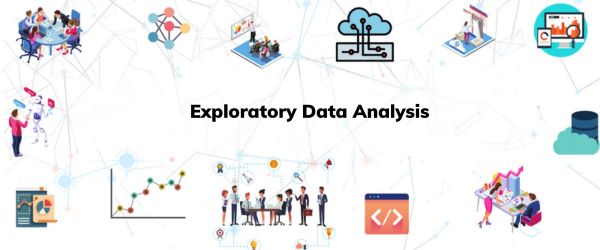

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

In [25]:
# Lets check the discrete and continuous features
categorical_features = [i for i in data.columns if data[i].nunique()<=4]
numeric_features = [i for i in data.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['Education', 'Gender', 'Smoking', 'BP_Medication', 'Had_Stroke', 'Was_Hypertensive', 'Had_Diabetes', 'Ten_Year_Risk']
['ID', 'Age', 'Cig_Per_Day', 'Tot_chol_Level', 'Systolic_BP', 'Diastolic _BP', 'BMI', 'heartRate', 'Glucose_level']


# Lets see ratio of Risky Patients:

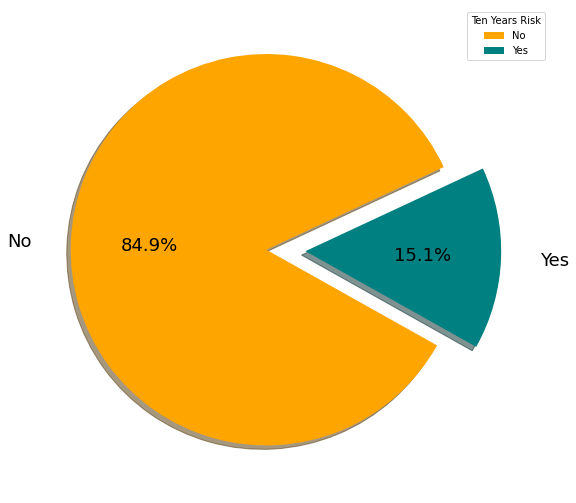

In [26]:
#plotting pie chart to get the ten year risk
my_labels = ['No','Yes']
my_explode = [0.2,0]
my_colors = ['orange','teal']
sizes = data['Ten_Year_Risk'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels,explode = my_explode,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25,shadow = True,pctdistance = 0.6,textprops={'fontsize': 18} )
plt.legend(title = 'Ten Years Risk')
plt.show()

**OBSERVATION:**

Here we can see there are **15.1%** people in our dataset are is risk for cardiovascular disease(ten year risk)and **84.9%** people are safe .

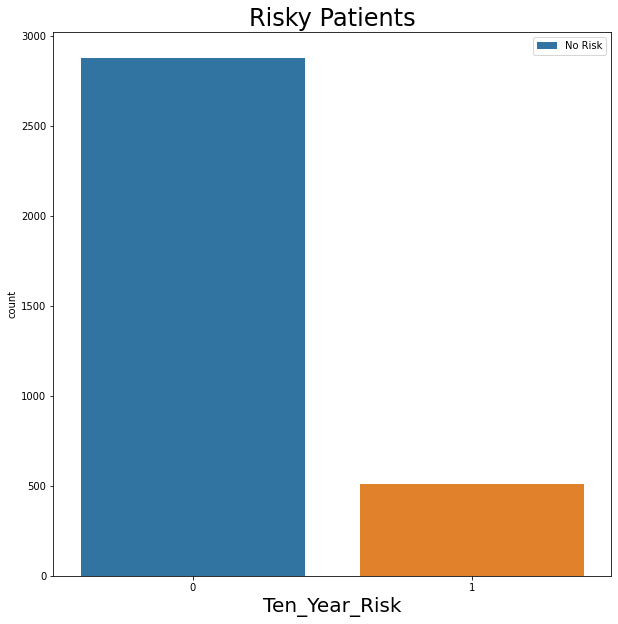

In [27]:
#plotting countplot to get the no of risky patients
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x="Ten_Year_Risk", data=data)
ax.set_xlabel( "Ten_Year_Risk" , size = 20 )
ax.set_title( "Risky Patients" , size = 24 )
plt.legend(['No Risk' , 'At Risk'])

**OBSERVATION:**

Above we can see the count of risky patient, around **500 patients** are in risk and approx. **2800 patient** are safe.

**15%** data of one class and **85%** of another class, this shows imbalance between the class.

Goal of any classification algorithm wants to increase the accurcy by reducing the error. Thus, does not take into account of class proportion or Imbalaanced class.

Imagine a scenario, here our model caps all observation as 0, though having accuracy of 85%. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored.

This kind of misclassification will encountere in situation like, Crucial Disease detection, fraud detection in bank, Telecomm chrun analysis.

Lets explain that situation in our task, if our model classifies a sample as risk, but actuall classification is Not risky. So in this sitution sample will get observation.

But incase our model classified risky patient as not risky, will be the issue.

We have balance the dataset before feeds to the model.

# **Lets check How individual features distributed with Target variable:**

## **Which Age group is more vulnerable to coronary heart disease ?**

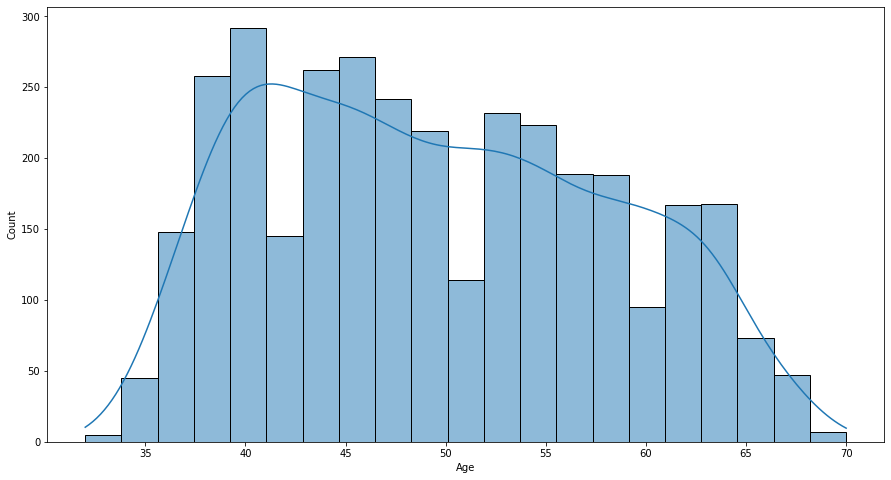

In [28]:
#plotting graph
fig, ax=plt.subplots(figsize=(15,8))
sns.histplot(data=data, x="Age", kde= True,ax=ax)
plt.show()

**OBSERVATION:**

Here we can see our data set contain the patients age between 32 to 70.

Text(0.5, 1.0, 'Risky Patients')

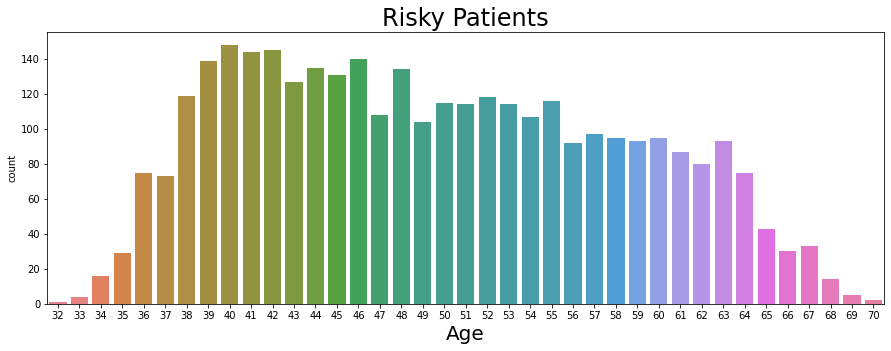

In [29]:
# Number risky patients with respect to age
fig, ax = plt.subplots(figsize = ( 15 , 5 ))
sns.countplot(x="Age", data=data,palette='husl')
ax.set_xlabel( "Age" , size = 20 )
ax.set_title( "Risky Patients" , size = 24 )

**OBSERVATION:**

Here we can see there is **more risk** of cardiovascular disease in patients of **age between 51 to 63**.

## **Which Gender is more vulnerable to coronary heart disease ?**

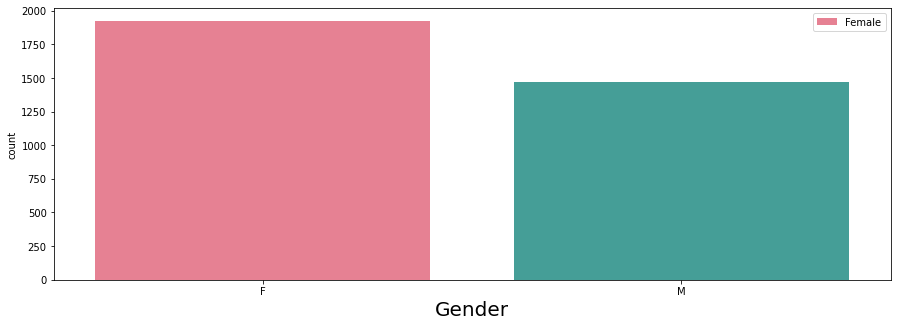

In [30]:
#Number of Female and Male
fig, ax = plt.subplots(figsize = ( 15 , 5 ))
sns.countplot(x="Gender", data=data,palette='husl')
ax.set_xlabel( "Gender" , size = 20 )
ax.set_title( "" , size = 24 )
plt.legend(['Female','Male'])

**OBSERVATION:**

Our dataset contains more no. of females than males.

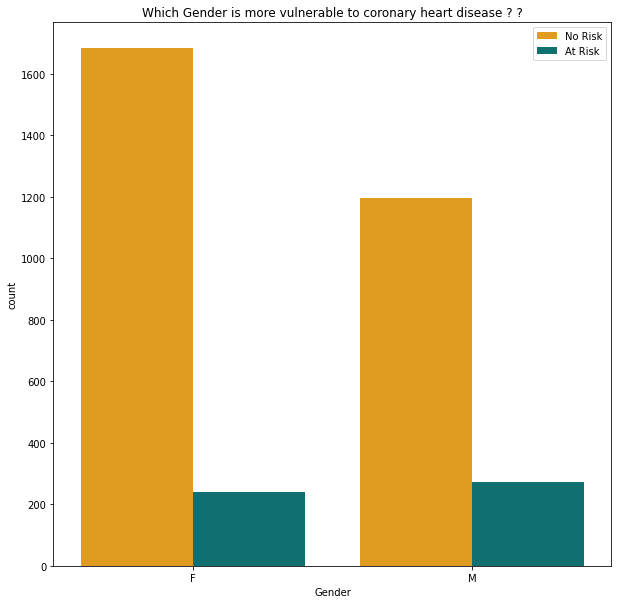

In [31]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = data['Gender'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Which Gender is more vulnerable to coronary heart disease ? ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see the **count of male and female are same in risk** , which is around 200 though females are more than males in our dataset.

## **Are smokers at more risk of coronary heart disease ??**

In [32]:
#getting the count of smokers and non smokers
data['Smoking'].value_counts()

NO     1703
YES    1687
Name: Smoking, dtype: int64

In [33]:
#getting ten years risk of smokers and non-smokers
smo=data.groupby('Smoking').count()
smo_df=pd.DataFrame(smo).reset_index()

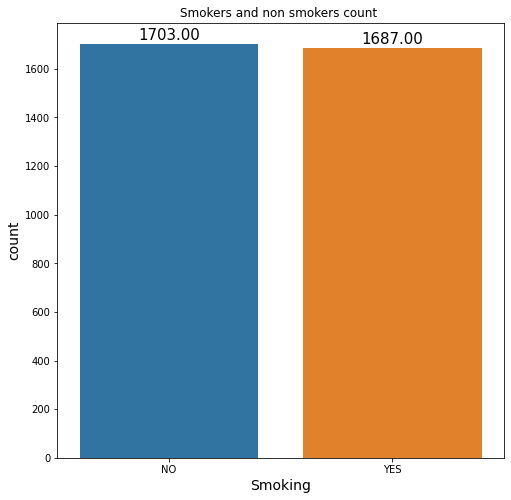

In [34]:
# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x=smo_df['Smoking'], y=smo_df['Ten_Year_Risk'] )
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Smoking", size=14)
 
# Setting the label for y-axis
plt.ylabel("count", size=14)
 
# Setting the title for the graph
plt.title("Smokers and non smokers count ")
 
# Fianlly showing the plot
plt.show()

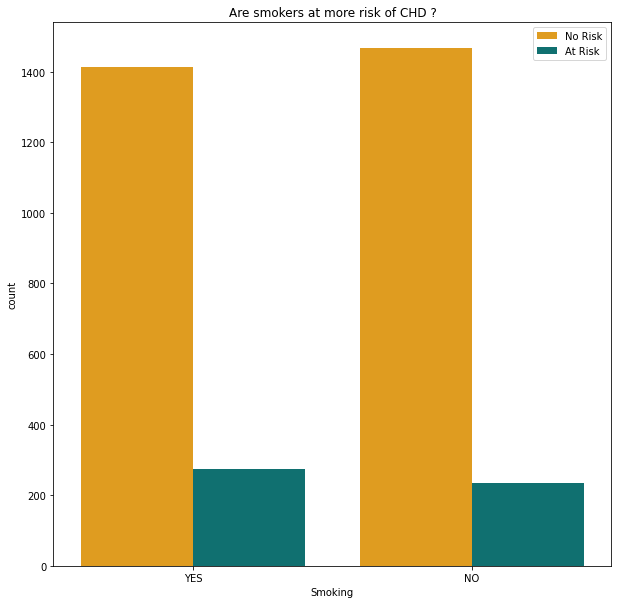

In [35]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = data['Smoking'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see around **250 smokers are in risk**  and around **210 non-smokers are is risk** for cardiovascular diseas. After seeing this we cannot directly say thay only smokers are at risk.

## **Distribution of cigarettes per day:**

Text(0.5, 1.0, 'Distribution of cigarettes per day')

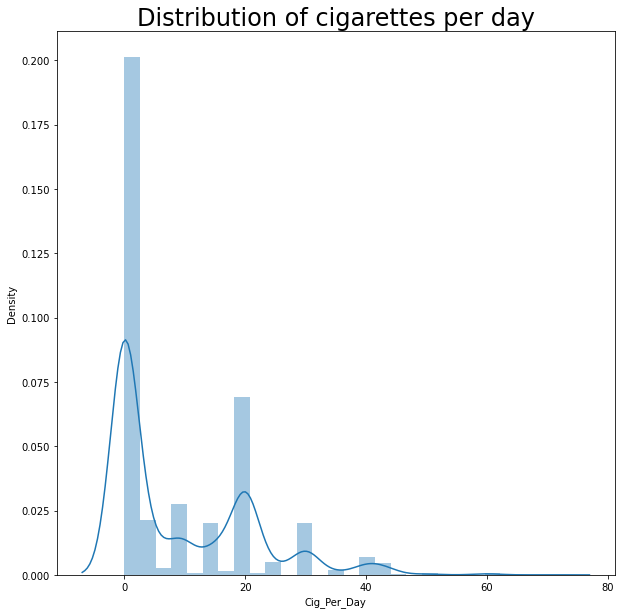

In [36]:
#getting the distribution of cigarettes
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot(data['Cig_Per_Day'])
ax.set_title( "Distribution of cigarettes per day" , size = 24 )

**OBSERVATION:**

Here some extreme values are there some persons are smoking **70 cigretes per day**, here it should not considered as outliers, if done it may reduces the power of the test. Here i proceed forward with these higher values.



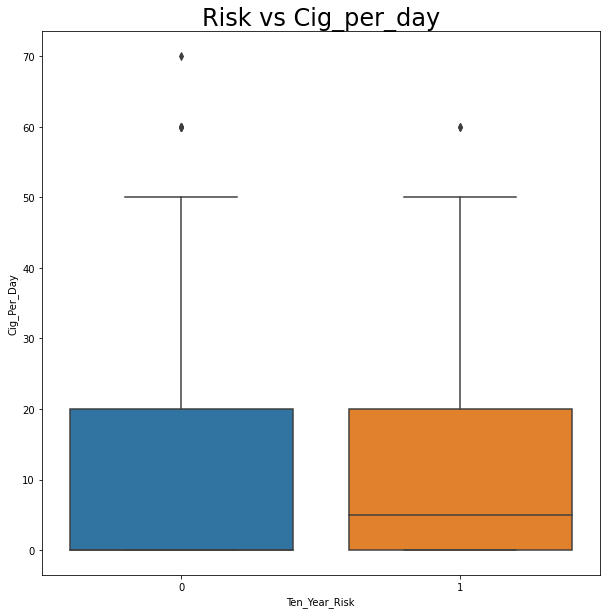

In [37]:
#plotting boxplot
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Cig_Per_Day", data=data)
ax.set_title( "Risk vs Cig_per_day" , size = 24 )
fig.savefig('cig_box')

**OBSERVATION:**

From above information we cant evedentially state smoking will leads to haert disease, as we seen from count plot there is no huge difference between these to comune and also our extreme smkoker who smokes **70 cigarettes per day is not having ten year risk**.

Though, I am not encouraging smoking here, Smoking is not important feature to decide whether the patient is at risk or not.

## **Are patients with blood pressure on medication at more risk of coronary heart disease ??**

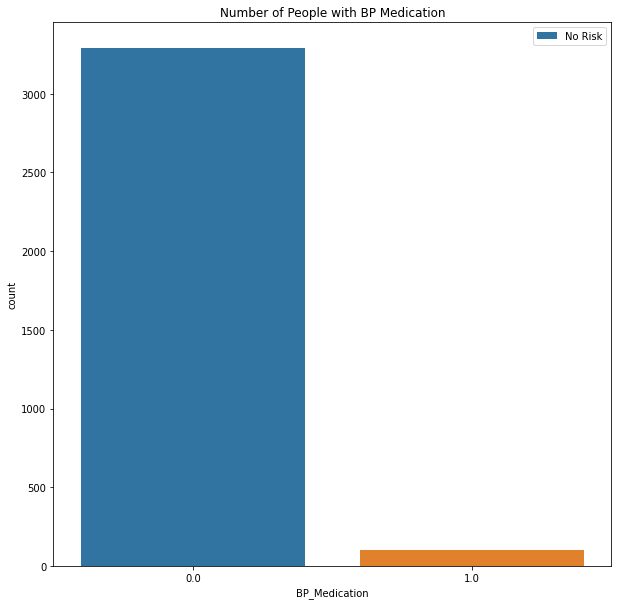

In [38]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x="BP_Medication", data=data)
plt.title("Number of People with BP Medication")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see around **200 people** are done with BP medication and around **3200 people** have not done any medication.

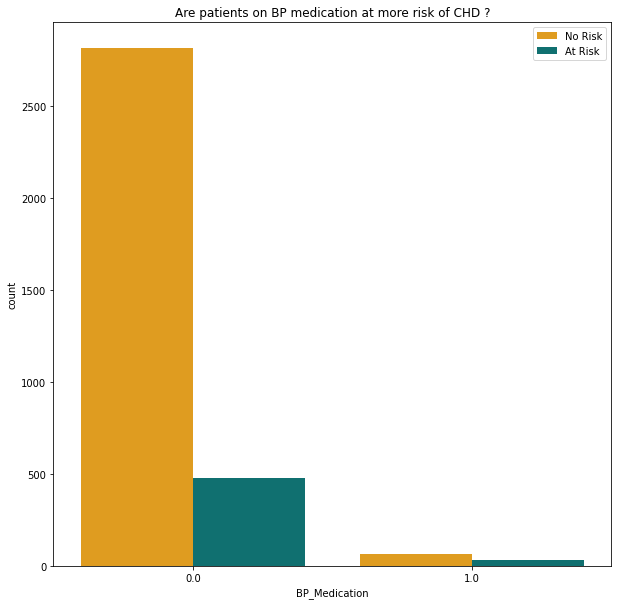

In [39]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = data['BP_Medication'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Are patients on BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see there are very few people who are done with BP medication which are around 200 but many people have not taken any BP medication and they are around 3200. After seeing this trend **we cannot say that after taking medication there is no risk.**

## **Whether a person who had a stroke earlier more prone to CHD?**

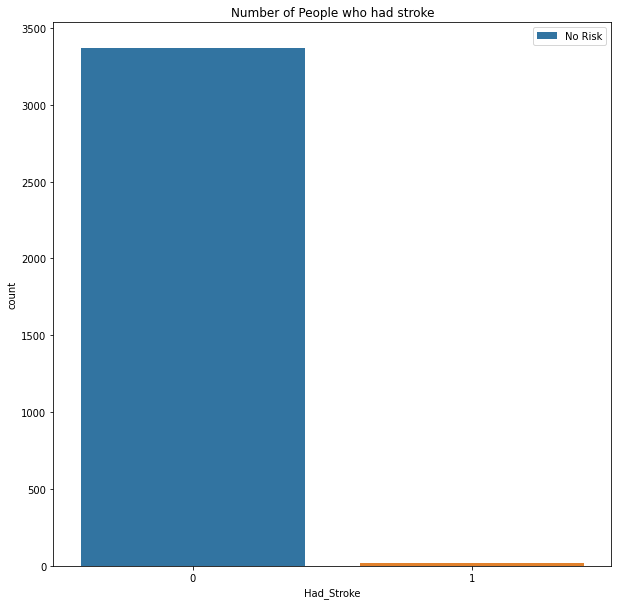

In [40]:
#plotting count plot
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x="Had_Stroke", data=data)
plt.title("Number of People who had stroke")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see **very few people had stroke** and around 3350 people yet not had stroke and are healthy enough.

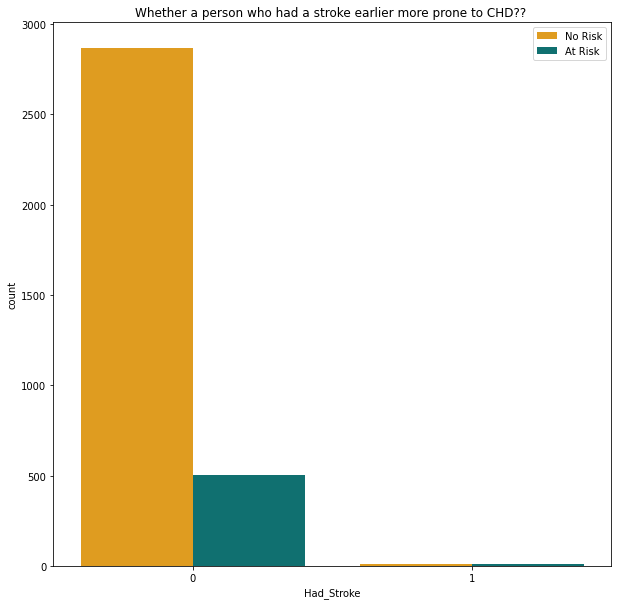

In [41]:
#plotting count plot
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data['Had_Stroke'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**OBSERVATION:**

There are **very few people had stroke**.

Here around **500 patients** who did not had stroke yet and **are at risk** and around **2800 patients are safe**.

## **Are hypertensive patients at more risk of coronary heart disease ??**

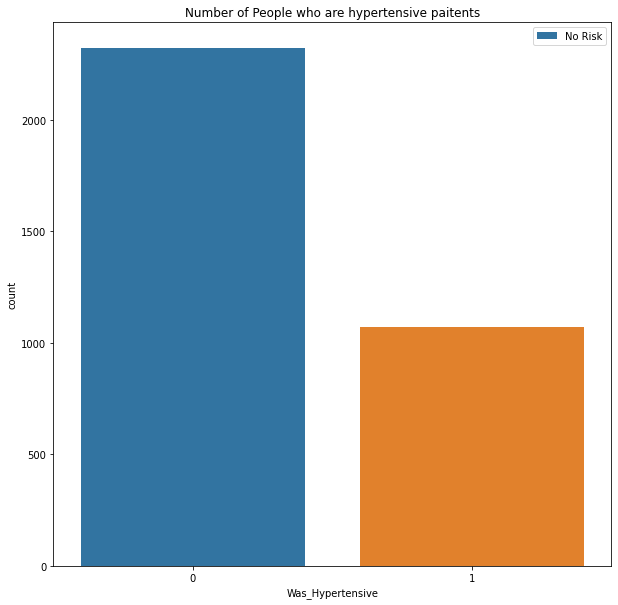

In [42]:
#plotting count plot
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x="Was_Hypertensive", data=data)
plt.title("Number of People who are hypertensive paitents")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see **1000 people** facing hypertensive and around **2400 people** are not facing any hypertensive.

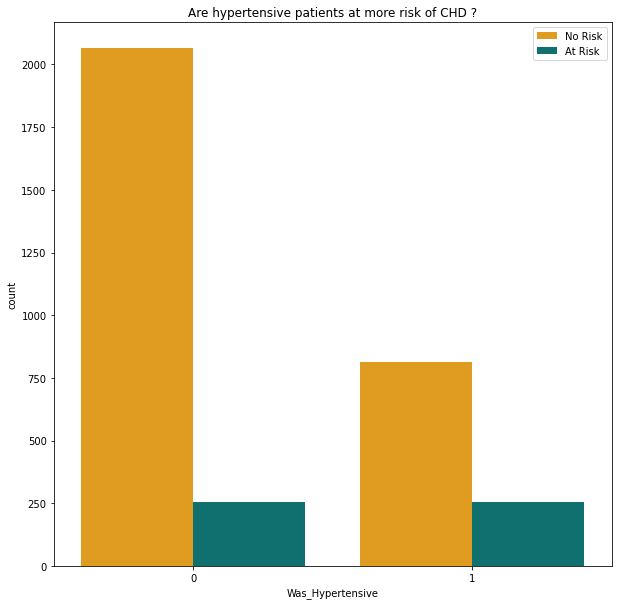

In [43]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data['Was_Hypertensive'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here around **250 people** with hypertension are in risk and around **255 people** with no hypertension are at risk.

## **Are diabetic patients at more risk of coronary heart disease ??**

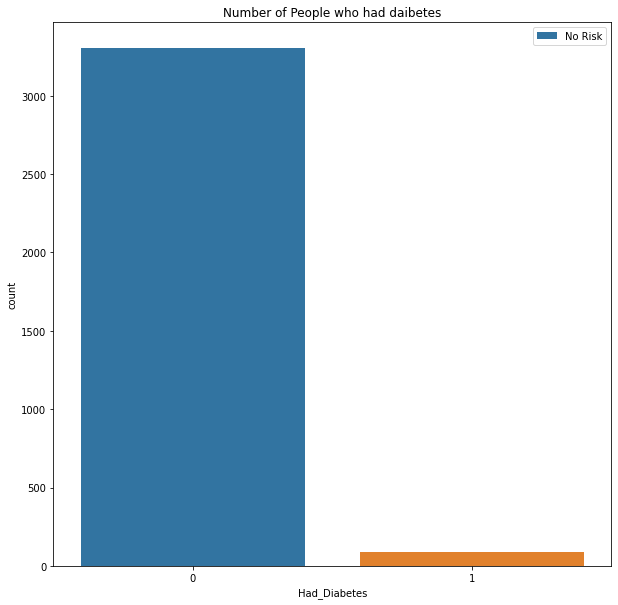

In [44]:
#plotting count plot
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x="Had_Diabetes", data=data)
plt.title("Number of People who had daibetes")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see around **100 people** had diabetes and around **3300 people** yet not had diabetes.

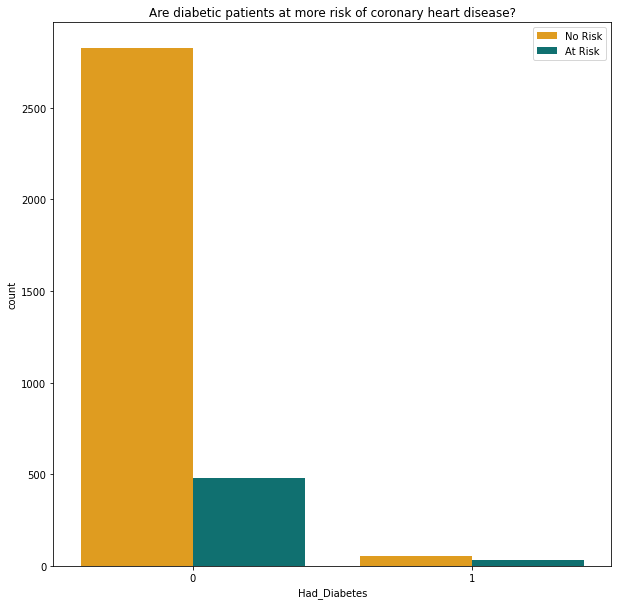

In [45]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = data['Had_Diabetes'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Are diabetic patients at more risk of coronary heart disease?")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here ,we can see **around 500** people who did not had diabetes are **at risk**.

And there are very few people who had diabetes are at risk.

So diabetes feature is not helping that much in ten years risk.

## **Lets check people with how much cholestorel level are at risk:**

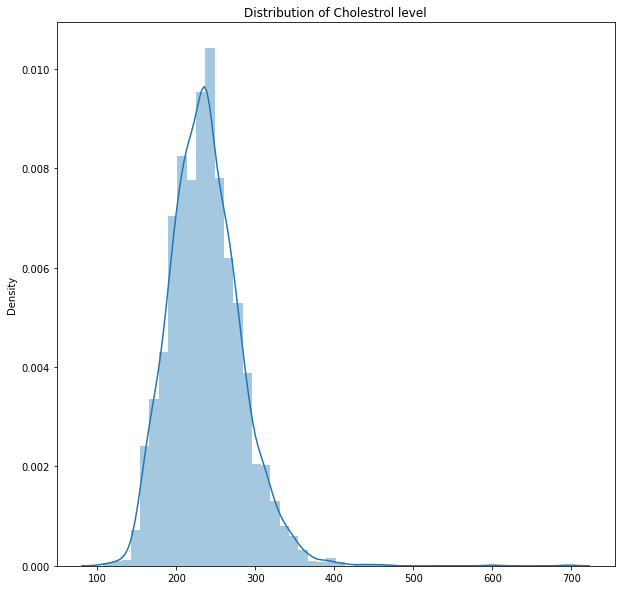

In [46]:
# Distribution of cholestrol level
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=data['Tot_chol_Level'])
ax.set_title( "Distribution of Cholestrol level" )
fig.savefig('Distribution of Cholestrol level')

**OBSERVATION:**

Here we can see most people cholestrol level lies **between 200 to 280**.

Text(0.5, 1.0, 'people with how much cholestorel level are at risk')

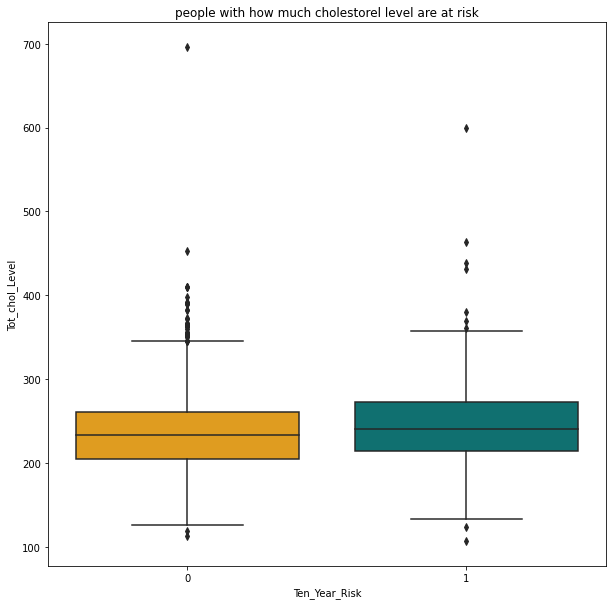

In [47]:
#plotting box plot
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Tot_chol_Level", data=data , palette = my_palette)
ax.set_title( "people with how much cholestorel level are at risk" )

**OBSERVATION:**

Here we can see most of the people who are **not in risk** their Cholestrol level lies **between 210 to 280** and people who **are in risk** their cholestrol level lies **between 215 to 285** there in not huge difference it is quite normal

## **Are patients with systolic BP at risk of CHD?**

Text(0.5, 1.0, 'Distribution of Systolic Pressure')

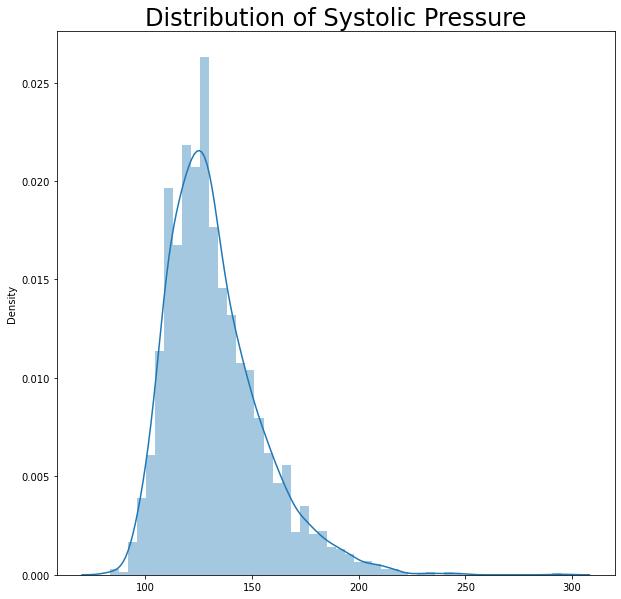

In [48]:
# Distribution of cholestrol level
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=data['Systolic_BP'])
ax.set_title( "Distribution of Systolic Pressure" , size = 24 )

**OBSERVATION:**

Here we can see most people systolic pressure lies **between 110 to 140**.

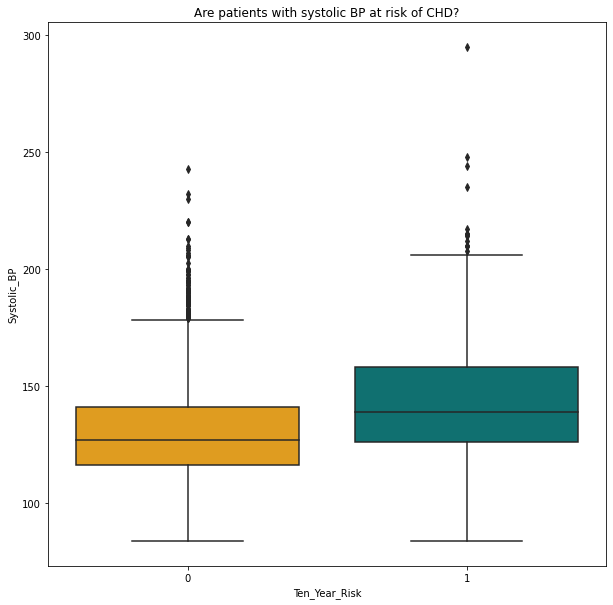

In [49]:
plt.figure(figsize = (10,10))
sns.boxplot(data['Ten_Year_Risk'], data['Systolic_BP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

**OBSERVATION:**

Here we can see most people who are not in risk their systolic BP lies between **110 to 140** and people who are at risk their systolic BP lies between **125 to 160**.

So, we can say that people with high systolic BP are at risk.

## **Are patients with Diastolic BP at risk of CHD?**

Text(0.5, 1.0, 'Distribution of Diastolic Pressure')

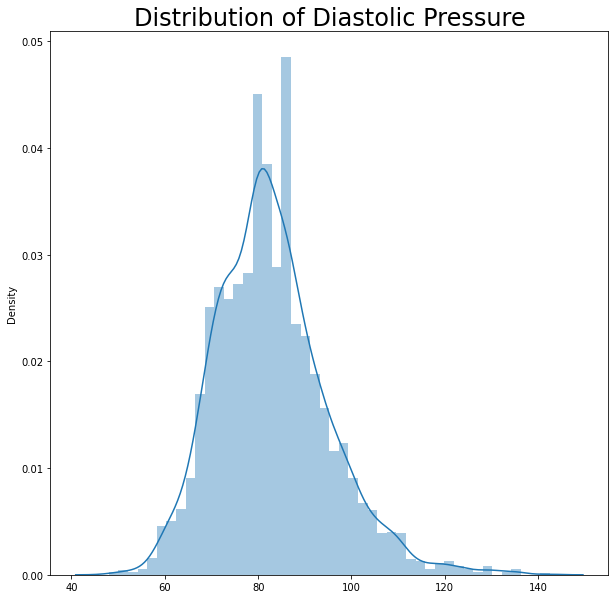

In [50]:
# Distribution of Diastolic Pressure
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=data['Diastolic _BP'])
ax.set_title( "Distribution of Diastolic Pressure" , size = 24 )

**OBSERVATION:**

Here we can see most people diastolic BP lies **between 75 to 85 approx**.

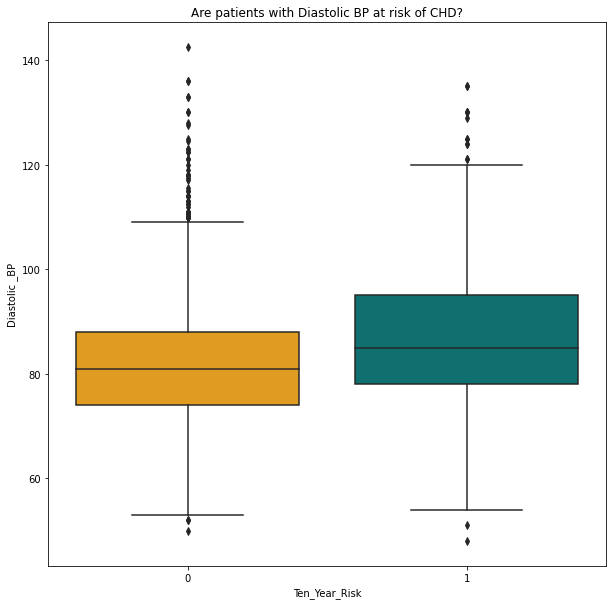

In [51]:
plt.figure(figsize = (10,10))
sns.boxplot(data['Ten_Year_Risk'], data['Diastolic _BP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

**OBSERVATION:**

Here we can see most people who are not in risk their diastolic BP lies** between 75 to 85** and people who are at risk their diastolic BP lies **between 89 to 90**.

So, we can say there is a slight increase in diastolic BP of people who are in risk.

## **Is patients BMI important to show the risk of CHD?**

Text(0.5, 1.0, 'Is patients BMI important to show the risk of CHD?')

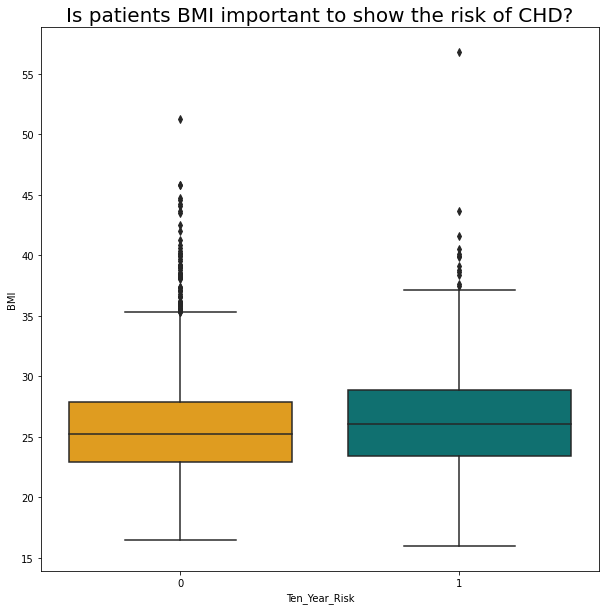

In [52]:
#plotting box plot
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="BMI", data=data,palette = my_palette)
ax.set_title( "Is patients BMI important to show the risk of CHD?" , size = 20 )

**OBSERVATION:**

Here we can see most people who are not in risk their BMI lies **between 22 to 28** and people who are at risk their BMI lies **between 23 to 29** approx.

We cannot see much difference BMI is approx same of risky and not risky people.

## **Is Heart rate is responsible for CHD ??**

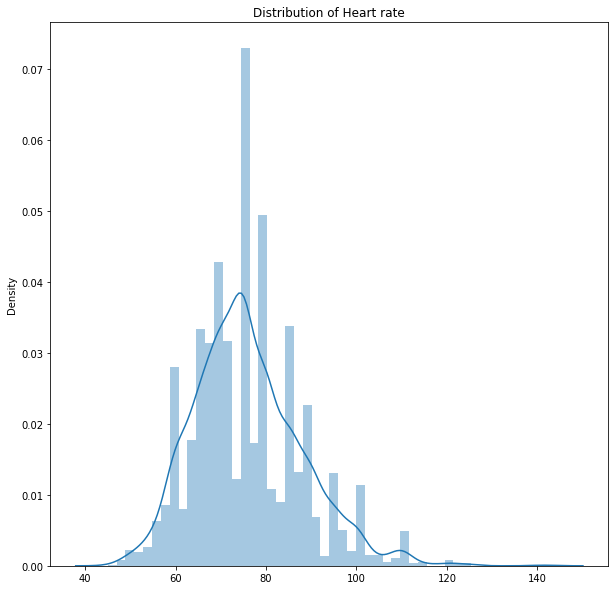

In [53]:
# Distribution of heart rate
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.distplot( x=data['heartRate'])
ax.set_title( "Distribution of Heart rate" )
fig.savefig('Distribution of Heart rate')

**OBSERVATION:**

Here we can see most people Heart rate lies **between 65 to 80**.

In [54]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [55]:
data['heartRateLabel'] = data.apply(heartRate_data, axis = 1)


In [56]:
data['heartRateLabel'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Normal
1       Normal
2       Normal
3       Normal
4       Normal
         ...  
3385    Normal
3386    Normal
3387    Normal
3388    Normal
3389    Normal
Name: heartRateLabel, Length: 3390, dtype: object>

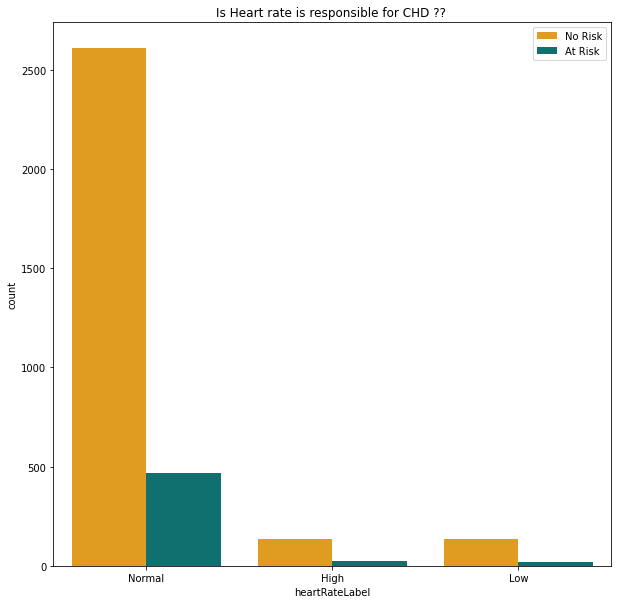

In [57]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = data['heartRateLabel'], hue = data['Ten_Year_Risk'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

**OBSERVATION:**

Here we can see most people who are at **risk their heart rate is normal**.

And the people with high heart rate and low heart rate have no risk.

## Lets check Heart Rate with respect to cigarettes per day:

In [58]:
#creating dataframe of hearrate and cig per day
heart_rate_VS_cig_per_day=data.groupby('heartRate')['Cig_Per_Day'].count()
heart_rate_VS_cig_per_day_df=pd.DataFrame(heart_rate_VS_cig_per_day).reset_index()


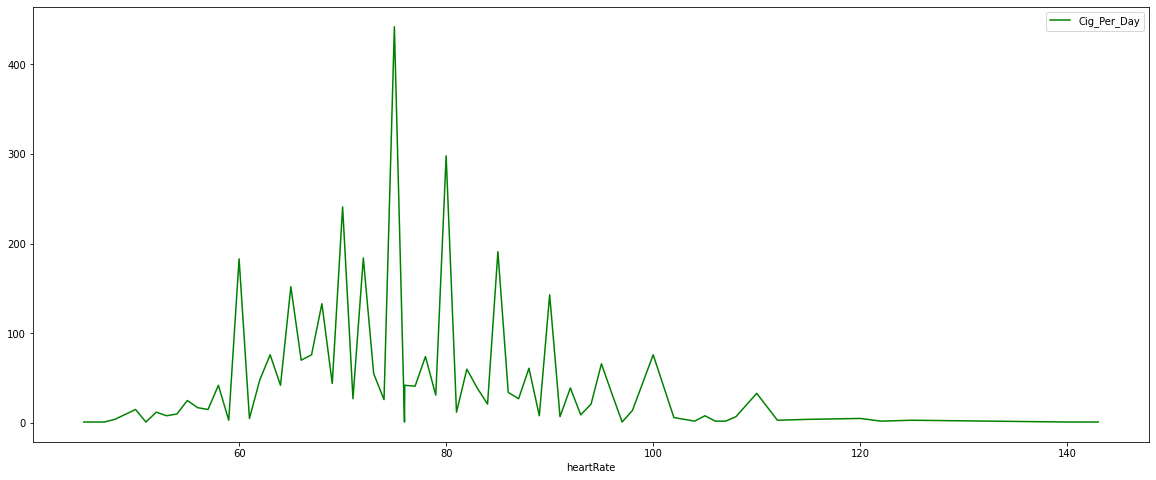

In [59]:
#plotting line graph
heart_rate_VS_cig_per_day_df.plot(x='heartRate',y='Cig_Per_Day', figsize=(20,8),color='g')

**OBSERVATION:**

Here we can see most people smoke cigarettes **between 1 to 10 approx**. and there heart rate lies **between 60 to 100**.

## **Can patients Glucose levels show the risk of CHD?**

Text(0.5, 1.0, 'Glucose level vs Risk')

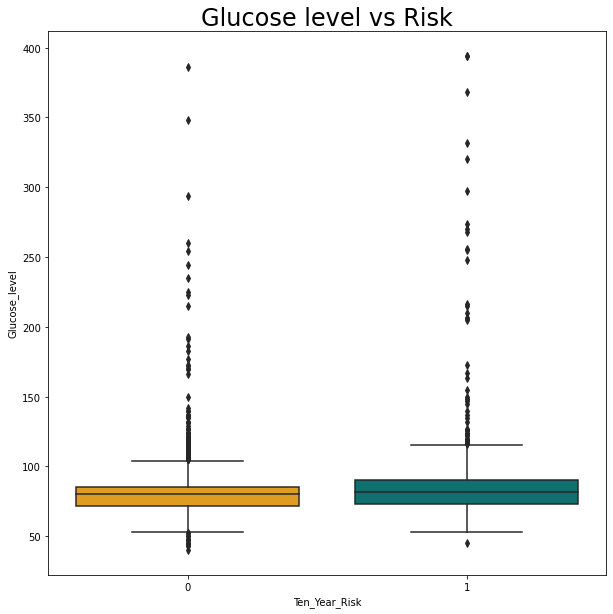

In [60]:
#plotting box plot
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="Ten_Year_Risk", y="Glucose_level", data=data,palette = my_palette)
ax.set_title( "Glucose level vs Risk" , size = 24 )

**OBSERVATION:**

Here we can see there is **not much difference** between the glucose level of risky and non risky patients. Glucose level lies **between 70 to 80** for both risky and non risky pattients.

# **Correlation Analysis**

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two or more, numerically measured, continuous variables. This analysis is useful when we need to check if there are possible connections between variables. We will utilize Heatmap for our analysis.

## **Heatmap**

A heatmap is a graphical representation of data that uses a system of color-coding to represent statistical relationship between different values.

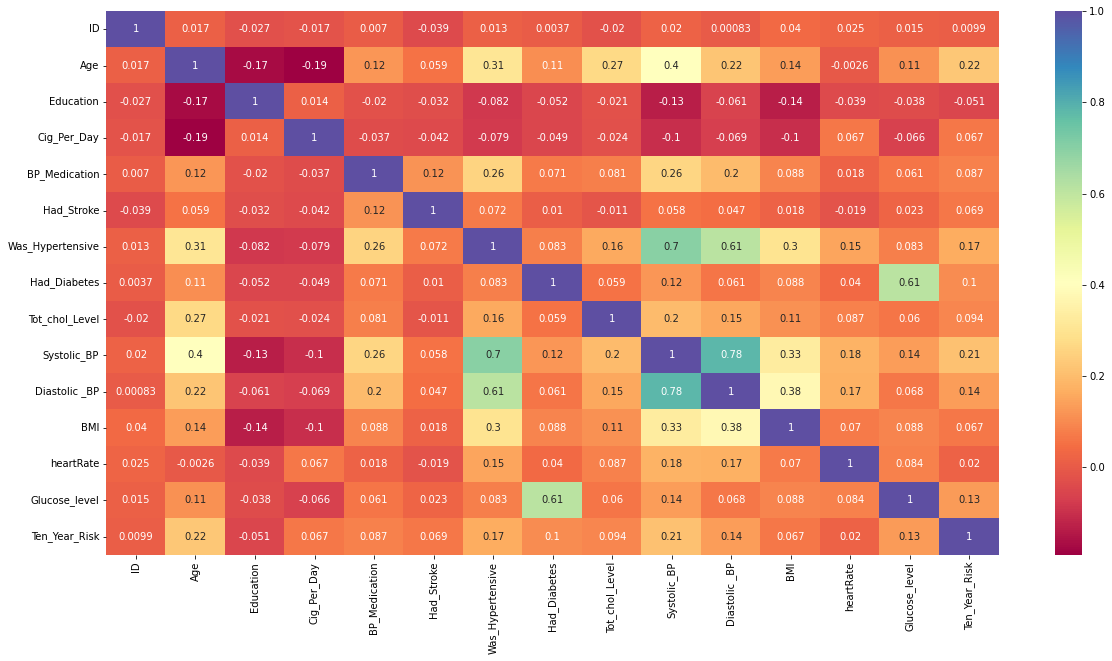

In [61]:
#finding Correlation
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='Spectral')
fig.savefig('Heatmap2')

**OBSERVATION:**

Here we can see systolic BP and was hypertensive variable are correlated, diastolic BP and was hypertensive variable are correlated, Glucose level and had diabetes variable are correlated diastolic BP and systolic BP are highly Correlated.

In [62]:
# create an new dataframe
data_df = data.copy(deep=True)

## **Label Encoding:**

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [63]:
# Data encoding
#label encoding
encoders_nums = {
                 "Smoking":{"YES":1,"NO":0},
                 }

In [64]:
data_df = data_df.replace(encoders_nums)
data_df.head(3)

,ID,Age,Education,Gender,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk,heartRateLabel
0,0,64,2.0,F,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,Normal
1,1,36,4.0,M,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,Normal
2,2,46,1.0,F,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,Normal


## **One Hot Encoding:**

Image result for one hot encoding One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

In [65]:
# One hot encoding
data_df = pd.get_dummies(data_df, columns=[ 'Gender'], prefix=["indi"])
data_df.head(3)

,ID,Age,Education,Smoking,Cig_Per_Day,BP_Medication,Had_Stroke,Was_Hypertensive,Had_Diabetes,Tot_chol_Level,Systolic_BP,Diastolic _BP,BMI,heartRate,Glucose_level,Ten_Year_Risk,heartRateLabel,indi_F,indi_M
0,0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,Normal,1,0
1,1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,Normal,0,1
2,2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,Normal,1,0


## **Handling Imbalanced Dataset:**

In [66]:
data_df = data_df[['Age', 'Education', 'indi_F','indi_M', 'Smoking', 'Cig_Per_Day',
       'BP_Medication', 'Had_Stroke', 'Was_Hypertensive', 'Had_Diabetes',
       'Tot_chol_Level', 'Systolic_BP', 'Diastolic _BP', 'BMI', 'heartRate',
       'Glucose_level', 'Ten_Year_Risk']]

ID, and demographic feature like Education not having much contribution to the target classification. Reduction Dimensionality is good way to avoid noisy data points invading.

Not Considering Feature "ID" for further process.

**SMOTE + Tomek Link:**

Technique constitue SMOTE followed by Tomek Link, SMOTE tries to create synthetic minority points between existing minority datapoints, after populating synthetic points, some points will overlaps over majaority, Tomek link pairs the minority with opposite class and removes it. It created the space between the class. Then its better to classify by the model.

In [67]:
# assign values for independent variable
X = data_df.iloc[:,0:-1]

# assign values for dependent variable
y = data_df['Ten_Year_Risk']

In [68]:
# import hybrit technique
from imblearn.combine import SMOTETomek
from collections import Counter

In [69]:
data_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [70]:
#fitting SMOTETomek
sme = SMOTETomek(random_state=23)
X_res, y_res = sme.fit_resample(X, y)

In [71]:
#printing original train data shape
print(f'Original train dataset shape: {Counter(y)}')

Original train dataset shape: Counter({0: 2879, 1: 511})


In [72]:
#printing resampled train data
print(f'Resampled train dataset shape: {Counter(y_res)}\n')

Resampled train dataset shape: Counter({1: 2857, 0: 2857})



In original we have 2879 Majority class, after SMOTE + Tomek, class gets balanced and majority class got reduced 2879 to 2857, by 22 points.

## **Smote:**

In [73]:
#importing library and package
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data_df.iloc[:,0:-1], data_df['Ten_Year_Risk'])

print('Original dataset shape', len(data_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [74]:
#getting rows and columns 
x_smote.shape, y_smote.shape

((5758, 16), (5758,))

In [75]:
#creating dataframe
X_resample=pd.DataFrame(x_smote)
y_resample=pd.DataFrame(y_smote)

In [76]:
'''#getting size
y_resample[0].value_counts()'''

KeyError: ignored

Prerequisite done for our dataset, lets feed our datapoints to model. Kickstart with Logistic regression.

In [77]:
#importing library and package
from sklearn.preprocessing import MinMaxScaler

## Splitting:

In [78]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x_smote,y_smote , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4606, 16)
(1152, 16)


## Scaling:

**Normalisation:**

Since logistic regression is parametric algorithm, uses gradient descent to converges to reach global minima. For the smooth convergence and equal update for every step, I am here normalizing the observations.

In [79]:
# scaling dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression:**

Logistic regression is a statistical analysis method used to predict a data value based on prior observations of a data set. ... A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

In [80]:
#importing library and package
from sklearn.linear_model import LogisticRegression
#fitting logistic regression
clf = LogisticRegression(fit_intercept=True, max_iter=100,penalty = 'none',solver='sag')
clf.fit(X_train, y_train)

LogisticRegression(penalty='none', solver='sag')

In [81]:
# Get the model coefficients
clf.coef_

array([[  2.45576294,  -0.19872454, -10.2677301 ,  -9.85570335,
         -0.66238785,   3.59356997,   0.56551402,  -0.30631353,
         -0.65553169,  -0.31110166,   1.97064278,   3.80775246,
          0.11004623,  -0.66165129,  -0.061991  ,   3.12637768]])

In [82]:
feature_importance =[ 2.63292258, -0.11299639, -1.17740799, -0.73088031,  0.35867582,
         1.089209  ,  0.53967987,  1.17901994,  0.22779002,  0.11633706,
         1.66821697,  2.66897003, -0.24372966, -0.33394445, -0.40590677,
         2.63272788]

## Feature Importance:

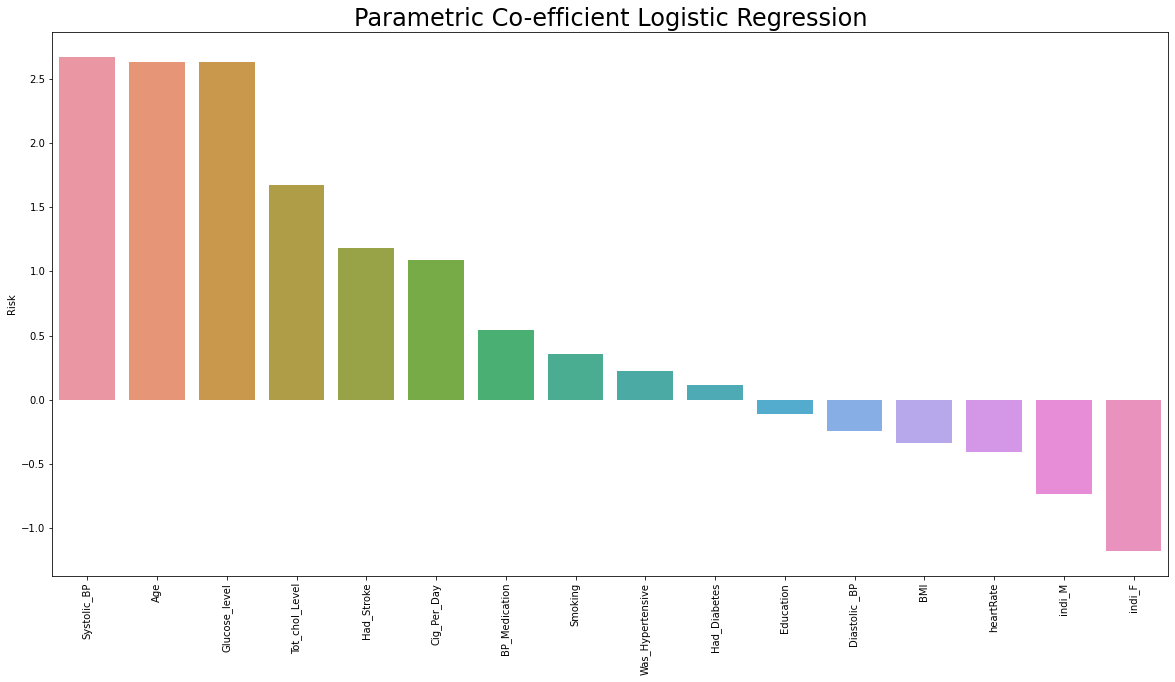

In [83]:
# Feature Importance plot
dictionary = dict(zip(data_df.columns.to_list()[:-1], feature_importance))
your_df_from_dict=pd.DataFrame.from_dict(dictionary,orient='index')

your_df_from_dict.sort_values(by=0,ascending=False,inplace=True)
your_df_from_dict.rename(columns= {0 :'Risk'},inplace=True)

fig, ax = plt.subplots(figsize = ( 20 , 10 ))
sns.barplot(x=your_df_from_dict.index, y='Risk', data=your_df_from_dict)
ax.set_title( "Parametric Co-efficient Logistic Regression" , size = 24 )
for item in ax.get_xticklabels():
    item.set_rotation(90)

**OBSERVATION:**

Here we can see age, systolic BP and glucose level variables are importent features.

## PREDICTING VALUES:

In [84]:
# Get the predicted probabilities
train_proba = clf.predict_proba(X_train)
test_proba = clf.predict_proba(X_test)

In [85]:
#getting train probability
train_proba[:,1]

array([0.10958435, 0.99995666, 0.13165326, ..., 0.13498659, 0.20496323,
       0.45502389])

In [86]:
#getting predicted probability
train_preds_prob = train_proba[:,1]
test_preds_prob =  test_proba[:,1]

In [87]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [88]:
train_class_preds

array([0, 1, 0, ..., 0, 0, 0])

## Train Evaluation:

In [89]:
# import metric for classification model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve,precision_recall_curve,average_precision_score,auc
import seaborn as sns
from sklearn import metrics

[[1899  427]
 [ 782 1498]]


[Text(0, 0.5, 'Not Risk'), Text(0, 1.5, 'Risk')]

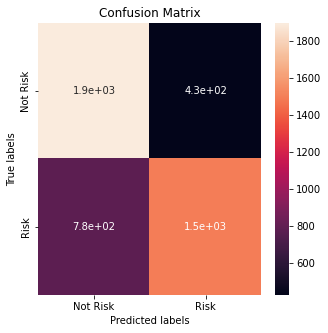

In [90]:
# Get the confusion matrix for both train
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells


# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [91]:
# Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7375162831089883
The accuracy on test data is  0.7378472222222222


Our model not labeled all observation as majaority, Convertion to balanced dataset be doing good. Lets try other variants of logistic regression to increase model performance.

In [92]:
# train
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_preds_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.8289686759891992


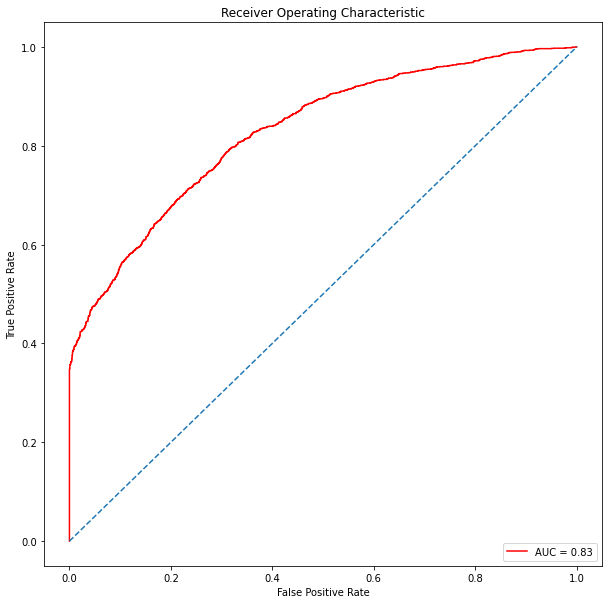

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig('Roc Logistic Train')

In [94]:
from sklearn.metrics import classification_report

In [95]:
# train classification report
# classification report for train
print(classification_report(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      2326
           1       0.78      0.66      0.71      2280

    accuracy                           0.74      4606
   macro avg       0.74      0.74      0.74      4606
weighted avg       0.74      0.74      0.74      4606



**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.68** and AUC ROC score of **0.73** for train data.

## TEST EVALUATION:

[[449 104]
 [198 401]]


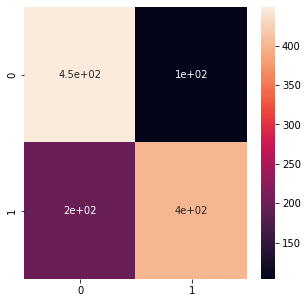

In [96]:
# Get the confusion matrix for both test
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

fig.savefig('Confusion matrix Logistic test')

In [97]:
# test
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_preds_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.8288346762385772


In [98]:
# classification report for test
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75       553
           1       0.79      0.67      0.73       599

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.75      0.74      0.74      1152



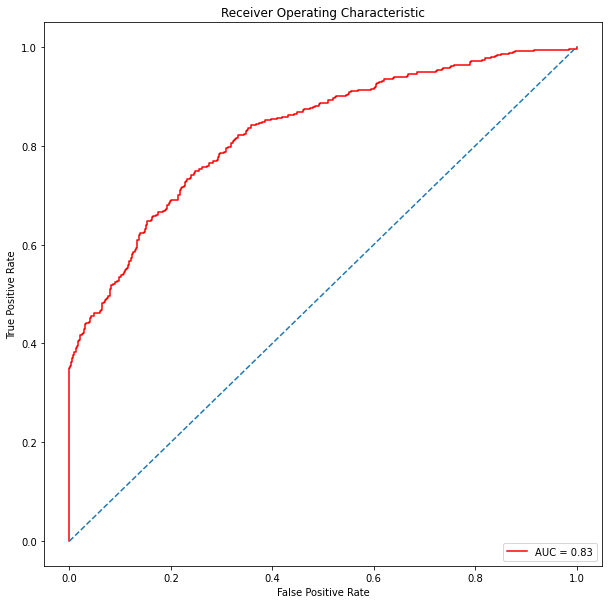

In [99]:
# test ROC curve
fig, ax = plt.subplots(figsize = ( 10 , 10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig.savefig('Roc Logistic Test')

**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.66** and AUC ROC score of **0.71** for test data.

With logistic regression we got the accuracy score of **0.68** on train data and **0.66** on test data.

## **Support Vector Machine:**

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

**SVM Baseline model:**

Lets run support vector classifier with Default parametres.

In [100]:
# import svm
from sklearn.svm import SVC

In [101]:
# create an instance
svc=SVC()

In [102]:
# fit the model to train set with all default parametres
svc.fit(X_train, y_train)

SVC()

In [103]:
#getting support vectors
svc.support_vectors_

array([[0.52631579, 0.        , 1.        , ..., 0.31415279, 0.2755102 ,
        0.07909605],
       [0.81578947, 0.        , 0.        , ..., 0.18462292, 0.54081633,
        0.12146893],
       [0.42105263, 0.        , 0.        , ..., 0.1748286 , 0.56122449,
        0.05084746],
       ...,
       [0.26315789, 0.66666667, 0.        , ..., 0.18682664, 0.25510204,
        0.21186441],
       [0.65789474, 0.50638261, 1.        , ..., 0.41518112, 0.23469388,
        0.09039548],
       [0.5       , 0.01297954, 0.        , ..., 0.15407507, 0.40538193,
        0.16982151]])

In [104]:
# Get the predicted classes
train_class_preds = svc.predict(X_train)
test_class_preds = svc.predict(X_test)

## Train Evaluation:

[[2014  312]
 [ 752 1528]]


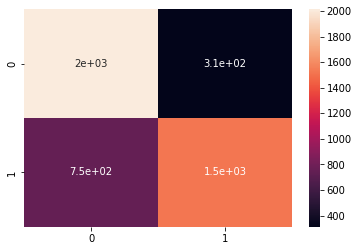

In [105]:
# Get the confusion matrix for train 

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [106]:
# train
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_class_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.7680197915252447


In [107]:
# classification report for test
print(classification_report(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      2326
           1       0.83      0.67      0.74      2280

    accuracy                           0.77      4606
   macro avg       0.78      0.77      0.77      4606
weighted avg       0.78      0.77      0.77      4606



**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.79** and AUC ROC score of **0.78** for train data.

## Test Evaluation:

[[472  81]
 [195 404]]


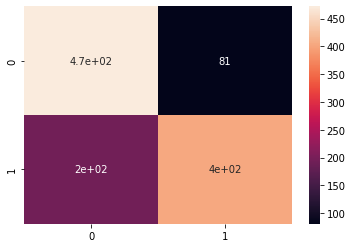

In [108]:
# Get the confusion matrix for test

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [109]:
# Roc Test
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_class_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.763991824831621


In [110]:
# classification report for test
print(classification_report(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       553
           1       0.83      0.67      0.75       599

    accuracy                           0.76      1152
   macro avg       0.77      0.76      0.76      1152
weighted avg       0.77      0.76      0.76      1152



**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.78** and AUC ROC score of **0.78** for train data.

With Support vector machine we got the train accuracy score of **0.79** and test accuracy score of **0.78**.

As we seen confusion matrix, SVC results better compare to logistic regression with default params. Lets tune some params and run gridsearch, cross validtion to get good model with optimal parametre.

## **Random Forest Classifier:**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [111]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [112]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
  'bootstrap': [True],

    'max_depth': [80, 90, 100, 110],

    'max_features': [2, 3],

    'min_samples_leaf': [3, 4, 5],

    'min_samples_split': [8, 10, 12],

    'n_estimators': [ 300, 1000]
    


}

# Create a based model

rf = RandomForestClassifier()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 3, n_jobs = -1, verbose = 2)



# Fit the grid search to the data

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [113]:
# prediction
grid_prediction_train = grid_search.predict(X_train)
grid_prediction_test =grid_search.predict(X_test)

## Train Evaluation:

[[2319    7]
 [  81 2199]]


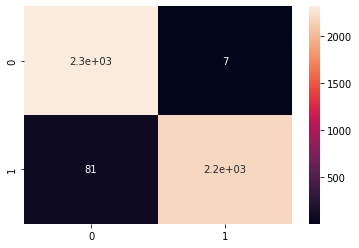

In [114]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [115]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2326
           1       1.00      0.96      0.98      2280

    accuracy                           0.98      4606
   macro avg       0.98      0.98      0.98      4606
weighted avg       0.98      0.98      0.98      4606



In [116]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, grid_prediction_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.98073211295651


**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.97** and AUC ROC score of **0.97** for train data.

## Test Evaluation:

[[511  42]
 [ 89 510]]


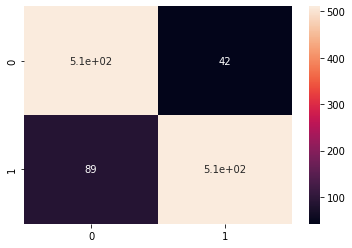

In [117]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [118]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       553
           1       0.92      0.85      0.89       599

    accuracy                           0.89      1152
   macro avg       0.89      0.89      0.89      1152
weighted avg       0.89      0.89      0.89      1152



In [119]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_prediction_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.8877348323154626


**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.89** and AUC ROC score of **0.88** for test data.

With Random forest classifier we got the train accuracy of **0.97** and test accuracy of **0.89**.

## **NEURAL NETWORK:**

Neural Network is an series of algorithm, its learning mimics as human brain. Learn from mistakes and finds the way or changes the characters to minimises the error.

As linear regression, neural networks also parametric algorithm uses gradient descent to optimizes the parametres. But here its an itertive process inherent with forward and backward propagation called epochs. By the prescense of input layer and hiden layer neural network will provide best possible outcome as we expected.

Lets use NN to our study, with hope of getting good outcome.

In [128]:
# Build Neural Networ
from keras.models import Sequential

from keras.layers import Dense

In [129]:
# sequential model
model = Sequential()

# first input layer with 16 nodes
model.add(Dense(18, input_dim=16, activation='relu'))

# Hidden layer with 8 nodes
model.add(Dense(8, activation='relu'))

# output layer with single node
model.add(Dense(1, activation='sigmoid'))

In [130]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=140, batch_size=10)

In [132]:
# lets predict
MNP_train_pred = model.predict(X_train)
MNP_test_pred = model.predict(X_test)

36/36 [==============================] - 0s 1ms/step


In [133]:
MNP_train_pred

array([[0.20860752],
       [0.9999804 ],
       [0.0648917 ],
       ...,
       [0.09765101],
       [0.1423446 ],
       [0.3585402 ]], dtype=float32)

In [134]:
# round predictions 
MNP_train_pred = [round(x[0]) for x in MNP_train_pred]

In [135]:
MNP_train_pred[:10]

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

## TRAIN EVALUATION:

[[2029  297]
 [ 578 1702]]


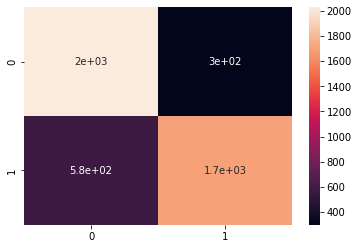

In [136]:
# Get the confusion matrix for train

labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, MNP_train_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [137]:
# classification report for train
print(classification_report(y_train, MNP_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      2326
           1       0.85      0.75      0.80      2280

    accuracy                           0.81      4606
   macro avg       0.81      0.81      0.81      4606
weighted avg       0.81      0.81      0.81      4606



In [138]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, MNP_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.809402105866558


**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.81** and AUC ROC score of **0.80** for train data.

## TEST EVALUATION:

In [139]:
# round predictions 
MNP_test_pred = [round(x[0]) for x in MNP_test_pred]

[[466  87]
 [178 421]]


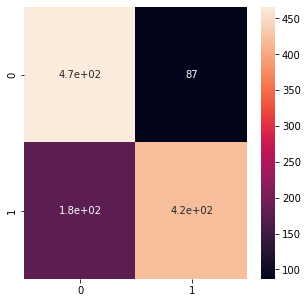

In [140]:
# Get the confusion matrix for test
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, MNP_test_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [141]:
# classification report for test
print(classification_report(y_test, MNP_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       553
           1       0.83      0.70      0.76       599

    accuracy                           0.77      1152
   macro avg       0.78      0.77      0.77      1152
weighted avg       0.78      0.77      0.77      1152



In [142]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, MNP_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.7727571872349032


**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.77** and AUC ROC score of **0.77** for test data.

With Neural Networks we got the Train Accuracy score of **0.81** and test accuracy score of **0.77.**

## **XGBoost Classifier:**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [120]:
# Various hyper-parameters to tune
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb1 = XGBClassifier()
#tuning hyperparameters
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4,5,6],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv =3,
                        n_jobs = 5,
                        verbose=True)
#fitting model
xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)#getting best score
print(xgb_grid.best_params_)#getting best parameters

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.9036061063608397
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [121]:
# prediction
grid_prediction_train = xgb_grid.predict(X_train)
grid_prediction_test = xgb_grid.predict(X_test)

## Train Evaluation:

[[2326    0]
 [  15 2265]]


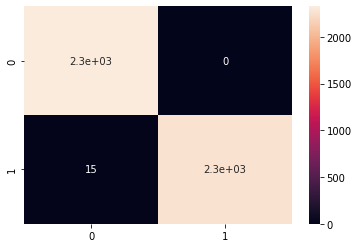

In [122]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_train, grid_prediction_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [123]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_train, grid_prediction_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2326
           1       1.00      0.99      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [124]:
# train roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, grid_prediction_train)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.9967105263157895


**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.99** and AUC ROC score of **0.98** for train data.

## Test Evaluation:

[[533  20]
 [ 95 504]]


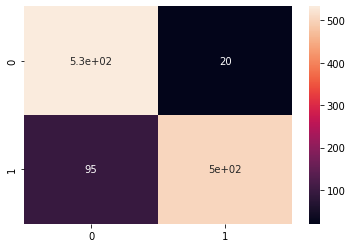

In [125]:
# Get the confusion matrix for both train and test
from sklearn.metrics import confusion_matrix
labels = ['Not Risk', 'Risk']
cm = confusion_matrix(y_test, grid_prediction_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

In [126]:
# classification report for train
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_prediction_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       553
           1       0.96      0.84      0.90       599

    accuracy                           0.90      1152
   macro avg       0.91      0.90      0.90      1152
weighted avg       0.91      0.90      0.90      1152



In [127]:
# test roc_AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_prediction_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Auc roc score ", roc_auc)

Auc roc score  0.9026179859742125


**OBSERVATION:**

Here above we can see the precision, recall and F1 score and we got accuracy of **0.90** and AUC ROC score of **0.90** for test data.

With XGBoost classifier we got the train accuracy score of **0.99** and test accuracy of **0.90**.

## **ROC AUC Comparison:**

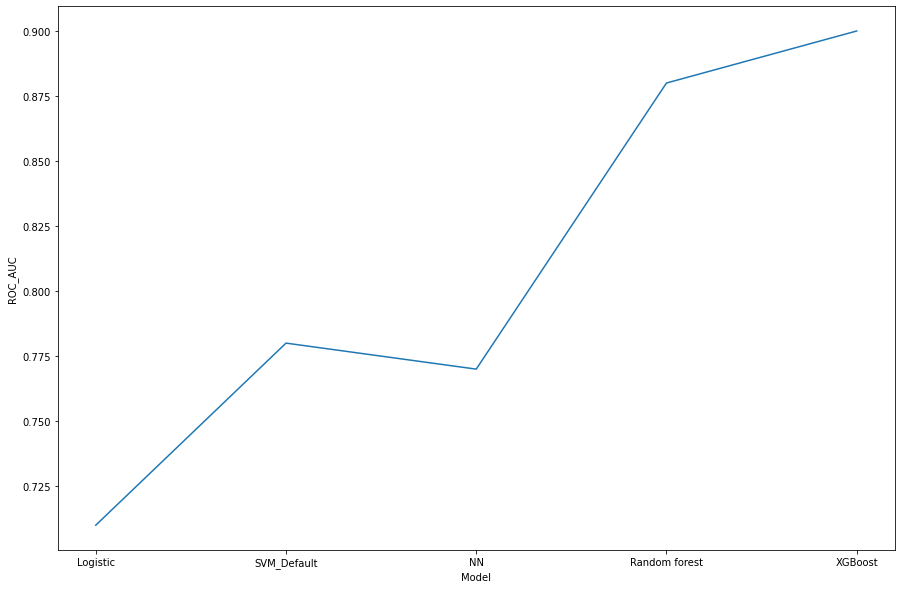

In [144]:
# empty dataframe
comparison_df = pd.DataFrame()

# model score
Dictionary1 = [{'Model':'Logistic','ROC_AUC':0.71},{'Model':'SVM_Default','ROC_AUC':0.78} ,{'Model':'NN','ROC_AUC':0.77},
                                                    {'Model':'Random forest','ROC_AUC':0.88},{'Model':'XGBoost','ROC_AUC':0.90}]

# append in dataframe
for i in Dictionary1:
  comparison_df = comparison_df.append(i,ignore_index=True)
comparison_df

# change index
comparison_df.set_index("Model",inplace=True)

# plot line plot
fig, ax = plt.subplots(figsize = ( 15 ,10 ))
sns.lineplot(data=comparison_df,x = "Model",  y="ROC_AUC")

OBSERVATION:

Here we can see Logistic Regression is not performing well and we got the great accuracy score with **XGBoost model**.

# **CONCLUSION:**

* There are 15.1 % people in our dataset are is risk for cardiovascular disease and 84.9 % people are safe (ten year risk).

* There is more risk of cardiovascular disease in patients of age between 51 to 63.

* The count of male and female are same in risk which is around 200, though females are more than males in our dataset.

* Around 250 smokers are in risk and around 210 non-smokers are is risk for cardiovascular disease.

* We cant evidentially state smoking will lead to heart disease, as we seen from count plot there is no huge difference between these to commune and also our extreme smoker who smokes 70 cigarettes per day is not having ten year risk.

* There are very few people who are done with BP medication which are around 200 but many people have not taken any BP medication and they are around 3200. We cannot say that after taking medication person is safe.

* Around 500 patients who did not had stroke yet and are at risk and around 2800 patients are safe.

* Around 250 people with hypertensive are in risk and around 255 people with no hypertensive are at risk.

* Here we can see people who did not had diabetes are more and around 500 people who did not had diabetes are at risk.And there are very few people who had diabetes are at risk.

